In [1]:
from sklearn.metrics import classification_report
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt

In [2]:
report_dict = {
    "Arborio": {"precision": 0.98, "recall": 0.98, "f1-score": 0.98, "support": 2997},
    "Basmati": {"precision": 0.98, "recall": 0.98, "f1-score": 0.98, "support": 2995},
    "Ipsala": {"precision": 1.00, "recall": 1.00, "f1-score": 1.00, "support": 3083},
    "Jasmine": {"precision": 0.96, "recall": 0.97, "f1-score": 0.97, "support": 2996},
    "Karacadag": {"precision": 0.99, "recall": 0.98, "f1-score": 0.99, "support": 2929},
    "accuracy": {"f1-score": 0.98, "support": 15000},
    "macro avg": {"precision": 0.98, "recall": 0.98, "f1-score": 0.98, "support": 15000},
    "weighted avg": {"precision": 0.98, "recall": 0.98, "f1-score": 0.98, "support": 15000},
}

# Convert to DataFrame
df = pd.DataFrame(report_dict).transpose()
print(df)

              precision  recall  f1-score  support
Arborio            0.98    0.98      0.98   2997.0
Basmati            0.98    0.98      0.98   2995.0
Ipsala             1.00    1.00      1.00   3083.0
Jasmine            0.96    0.97      0.97   2996.0
Karacadag          0.99    0.98      0.99   2929.0
accuracy            NaN     NaN      0.98  15000.0
macro avg          0.98    0.98      0.98  15000.0
weighted avg       0.98    0.98      0.98  15000.0


In [3]:
from sqlalchemy import create_engine

# Define your PostgreSQL credentials
username = 'postgres'
password = 'postgres'
host = 'localhost'  # Or your database server's IP address
port = '5432'
database = 'Rice_DB'

# Create a connection string
connection_string = f"postgresql://{username}:{password}@{host}:{port}/{database}"

# Create SQLAlchemy engine
engine = create_engine(connection_string)

In [4]:
# Define the table name where you want to store the data
table_name = "classification_report"

# Save DataFrame to the database
df.to_sql(table_name, engine, if_exists="replace", index=True)
print(f"Data successfully saved to table '{table_name}' in the database.")

Data successfully saved to table 'classification_report' in the database.


In [5]:
#query the data in SQL DB
query = "SELECT * FROM classification_report;"
df = pd.read_sql_query(query, engine)

In [6]:
#view Daataframe
print("All Data:")
print(df)

All Data:
          index  precision  recall  f1-score  support
0       Arborio       0.98    0.98      0.98   2997.0
1       Basmati       0.98    0.98      0.98   2995.0
2        Ipsala       1.00    1.00      1.00   3083.0
3       Jasmine       0.96    0.97      0.97   2996.0
4     Karacadag       0.99    0.98      0.99   2929.0
5      accuracy        NaN     NaN      0.98  15000.0
6     macro avg       0.98    0.98      0.98  15000.0
7  weighted avg       0.98    0.98      0.98  15000.0


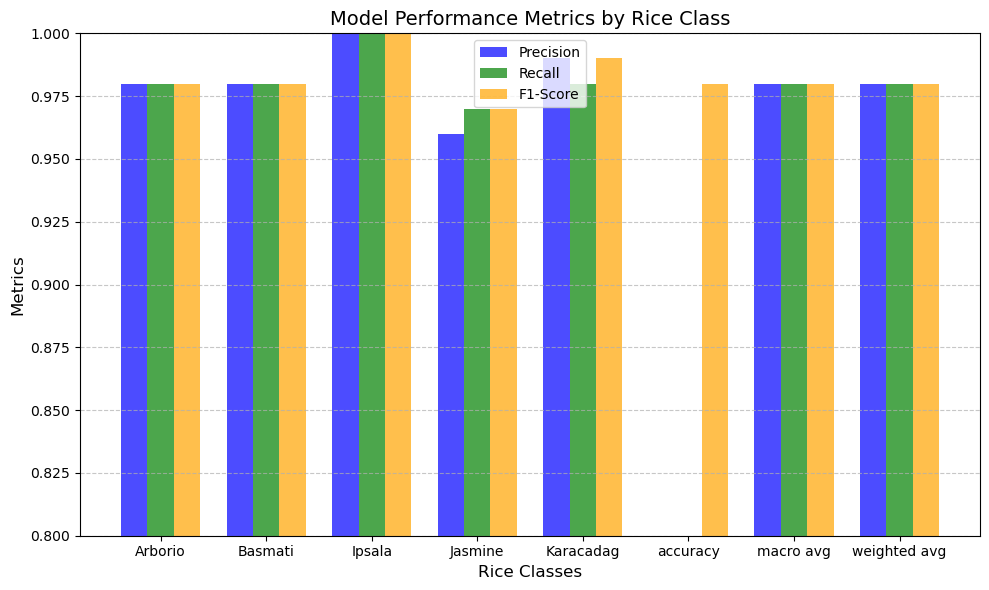

In [11]:
# Set figure size for better readability
plt.figure(figsize=(10, 6))

# Plot each metric
bar_width = 0.25  # Adjust bar width for spacing
x = range(len(df['index']))

# Plotting bars for each metric
plt.bar(x, df['precision'], width=bar_width, label='Precision', color='blue', alpha=0.7)
plt.bar([i + bar_width for i in x], df['recall'], width=bar_width, label='Recall', color='green', alpha=0.7)
plt.bar([i + 2 * bar_width for i in x], df['f1-score'], width=bar_width, label='F1-Score', color='orange', alpha=0.7)

# Add labels and title
plt.xlabel('Rice Classes', fontsize=12)
plt.ylabel('Metrics', fontsize=12)
plt.title('Model Performance Metrics by Rice Class', fontsize=14)
plt.xticks([i + bar_width for i in x], df['index'], fontsize=10)
plt.ylim(0.8, 1.0)  # Focus on the performance range for better clarity

# Add gridlines for easier comparison
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add legend
plt.legend()

# Display the chart
plt.tight_layout()
plt.show()


In [8]:
engine.dispose()